<a href="https://colab.research.google.com/github/utkarshg1/DL-2pm-4pm-Weekend/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Machine Learning
No target feature for prediction

## Clustering
Main goal is to categorize similar points togethor

## K-means clustering
Centroid (average of x and average of y)

In [2]:
%pip install yellowbrick plotly nbformat

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform customer segmentation based on Age, Income and spending

### Perform Basic Data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [6]:
df.duplicated().sum()

0

### Seperate the X values

In [7]:
X = df.loc[:,["Age", "Income", "Spending"]]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
import plotly.express as px
fig1 = px.scatter_3d(
    X,
    x = "Age",
    y = "Income",
    z = "Spending",
    title = "Age, Income, Spending"
)
fig1.show()

### Perform preprocessing on X

In [10]:
X.dtypes

,0
Age,int64
Income,int64
Spending,int64


In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Deciding optimal number of clusters with elbow method

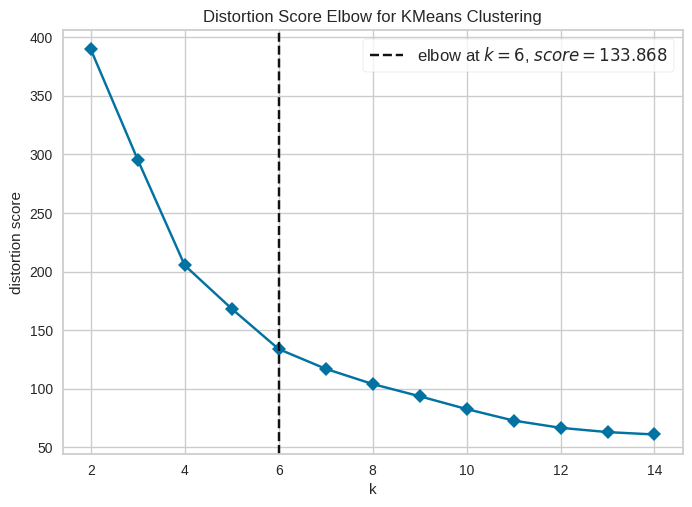

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model1 = KMeans()

visualizer = KElbowVisualizer(model1, k=(2, 15), timings=False)
visualizer.fit(X_pre)
visualizer.show()

### From above graph best cluster found at k=6

In [18]:
best_kmeans = KMeans(n_clusters=6)
best_kmeans.fit(X_pre)

KMeans(n_clusters=6)

In [19]:
lb1 = best_kmeans.labels_
lb1

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2,
       0, 2, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 5, 1, 5, 3, 5, 3, 5, 3, 5,
       1, 5, 3, 5, 3, 5, 1, 5, 3, 5, 1, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 4, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5], dtype=int32)

In [20]:
X1 = X.copy()
X1["Cluster"] = lb1
X1.head()

,Age,Income,Spending,Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


In [21]:
X1.query("Cluster == 0")

,Age,Income,Spending,Cluster
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0


In [22]:
X1.query("Cluster == 1")

,Age,Income,Spending,Cluster
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1
69,32,48,47,1


In [23]:
for i in range(6):
  print(f"Cluster : {i}\n")
  display(X1.query(f"Cluster == {i}"))
  print("\n===========================================\n")

Cluster : 0



,Age,Income,Spending,Cluster
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




Cluster : 1



,Age,Income,Spending,Cluster
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1
68,19,48,59,1
69,32,48,47,1




Cluster : 2



,Age,Income,Spending,Cluster
0,19,15,39,2
1,21,15,81,2
3,23,16,77,2
5,22,17,76,2
7,23,18,94,2
9,30,19,72,2
11,35,19,99,2
13,24,20,77,2
15,22,20,79,2
17,20,21,66,2




Cluster : 3



,Age,Income,Spending,Cluster
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3
150,43,78,17,3




Cluster : 4



,Age,Income,Spending,Cluster
40,65,38,35,4
46,50,40,55,4
50,49,42,52,4
53,59,43,60,4
54,50,43,45,4
55,47,43,41,4
56,51,44,50,4
57,69,44,46,4
59,53,46,46,4
60,70,46,56,4




Cluster : 5



,Age,Income,Spending,Cluster
123,39,69,91,5
125,31,70,77,5
127,40,71,95,5
129,38,71,75,5
131,39,71,75,5
133,31,72,71,5
135,29,73,88,5
137,32,73,73,5
139,35,74,72,5
141,32,75,93,5


In [24]:
X1.groupby(by="Cluster").mean(numeric_only=True)

,Age,Income,Spending
Cluster,,,
0,45.523810,26.285714,19.380952
1,26.684211,57.578947,47.789474
2,25.250000,25.833333,76.916667
3,41.939394,88.939394,16.969697
4,56.333333,54.266667,49.066667
5,32.692308,86.538462,82.128205


In [25]:
fig2 = px.scatter_3d(
    X1,
    x = "Age",
    y = "Income",
    z = "Spending",
    color = "Cluster",
    title = "Customer Segmentation"
)
fig2.show()